In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [62]:
df = pd.read_json('data.json')

In [63]:
df

,normalized_mouth_area,width_over_height,label
0,0.325770,1.928138,open
1,0.495050,100.000000,open
2,0.183761,15.427249,open
3,0.381148,100.000000,open
4,0.383047,100.000000,open
...,...,...,...
228,0.240685,48.301139,closed
229,0.161975,100.000000,closed
230,0.203498,25.573424,closed
231,0.281815,55.154329,closed


C:\Users\felip\AppData\Local\Temp\ipykernel_32848\595721016.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='pastel')


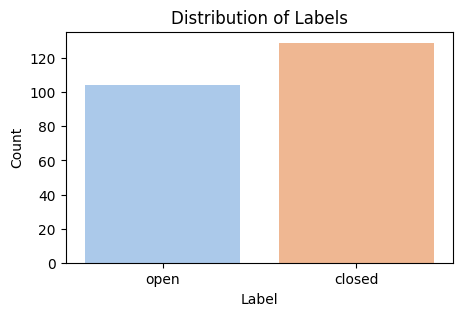

C:\Users\felip\AppData\Local\Temp\ipykernel_32848\595721016.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y='normalized_mouth_area', palette='pastel')


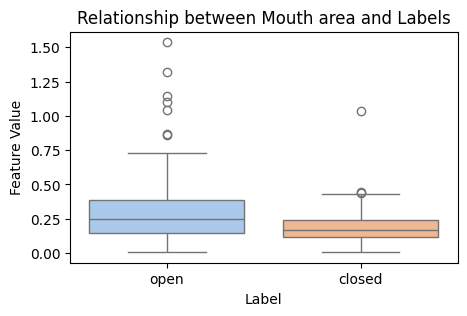

C:\Users\felip\AppData\Local\Temp\ipykernel_32848\595721016.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y='width_over_height', palette='pastel')


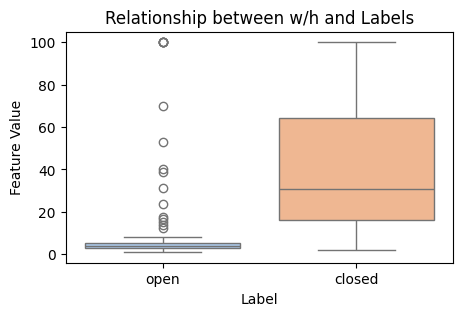

In [64]:
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='label', palette='pastel')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(5, 3))
sns.boxplot(data=df, x='label', y='normalized_mouth_area', palette='pastel')
plt.title('Relationship between Mouth area and Labels')
plt.xlabel('Label')
plt.ylabel('Feature Value')
plt.show()

plt.figure(figsize=(5, 3))
sns.boxplot(data=df, x='label', y='width_over_height', palette='pastel')
plt.title('Relationship between w/h and Labels')
plt.xlabel('Label')
plt.ylabel('Feature Value')
plt.show()

In [65]:
X = df[['normalized_mouth_area', 'width_over_height']].values
y = df['label'].values

In [66]:
classifier = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

classifier.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()), ('classifier', SVC())])

In [67]:
y_train_pred = cross_val_predict(classifier, X, y, cv=100)
y_train_pred

array(['open', 'closed', 'closed', 'closed', 'closed', 'closed', 'open',
       'open', 'closed', 'open', 'closed', 'open', 'open', 'open', 'open',
       'open', 'closed', 'open', 'open', 'closed', 'open', 'open', 'open',
       'open', 'open', 'open', 'open', 'closed', 'open', 'open', 'closed',
       'open', 'closed', 'open', 'open', 'open', 'open', 'open', 'open',
       'open', 'open', 'closed', 'open', 'open', 'open', 'open', 'open',
       'closed', 'open', 'open', 'open', 'open', 'open', 'open', 'open',
       'open', 'open', 'open', 'open', 'open', 'open', 'open', 'open',
       'open', 'closed', 'open', 'open', 'open', 'open', 'open', 'open',
       'open', 'open', 'open', 'open', 'open', 'open', 'open', 'open',
       'open', 'closed', 'open', 'open', 'open', 'open', 'open', 'open',
       'open', 'open', 'open', 'open', 'open', 'open', 'open', 'open',
       'open', 'open', 'open', 'open', 'open', 'open', 'open', 'open',
       'open', 'closed', 'closed', 'closed', 'closed'

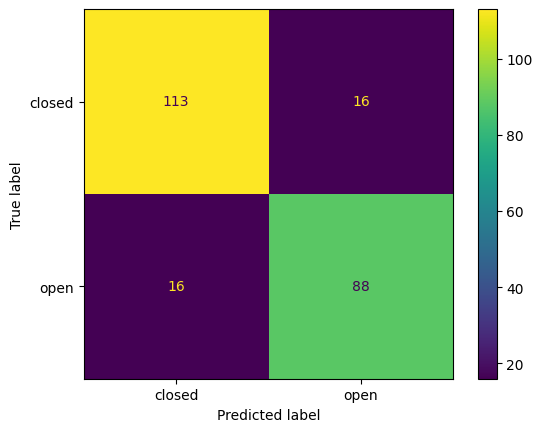

In [68]:
mat = confusion_matrix(y, y_train_pred)
ConfusionMatrixDisplay(mat, display_labels=classifier.classes_).plot()

In [69]:
precision = precision_score(y, y_train_pred, average='weighted')
recall = recall_score(y, y_train_pred, average='weighted')
f1_score = 2 * (precision * recall) / (precision + recall)

print(precision)
print(recall)
print(f1_score)

0.8626609442060086
0.8626609442060086
0.8626609442060086


In [70]:
import pickle

pickle.dump(classifier, open('mouthcloseness_model.pkl','wb'))